# Music Trends & Emotion Analysis (1950–2019) and Recommendation System

### Importing Libraries & Dataset

In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv(r"C:\Users\USER\Downloads\tcc_ceds_music.csv")  
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


### Data Cleaning

In [60]:
df = df.drop('Unnamed: 0', axis=1)

### Data Exploration

In [50]:
df.shape

(28372, 30)

In [5]:
df.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic',
       'age'],
      dtype='object')

In [6]:
df.dtypes

artist_name                  object
track_name                   object
release_date                  int64
genre                        object
lyrics                       object
len                           int64
dating                      float64
violence                    float64
world/life                  float64
night/time                  float64
shake the audience          float64
family/gospel               float64
romantic                    float64
communication               float64
obscene                     float64
music                       float64
movement/places             float64
light/visual perceptions    float64
family/spiritual            float64
like/girls                  float64
sadness                     float64
feelings                    float64
danceability                float64
loudness                    float64
acousticness                float64
instrumentalness            float64
valence                     float64
energy                      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28372 non-null  object 
 1   track_name                28372 non-null  object 
 2   release_date              28372 non-null  int64  
 3   genre                     28372 non-null  object 
 4   lyrics                    28372 non-null  object 
 5   len                       28372 non-null  int64  
 6   dating                    28372 non-null  float64
 7   violence                  28372 non-null  float64
 8   world/life                28372 non-null  float64
 9   night/time                28372 non-null  float64
 10  shake the audience        28372 non-null  float64
 11  family/gospel             28372 non-null  float64
 12  romantic                  28372 non-null  float64
 13  communication             28372 non-null  float64
 14  obscen

In [9]:
df.describe()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,0.076680,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,0.109538,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,0.132136,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [12]:
df.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

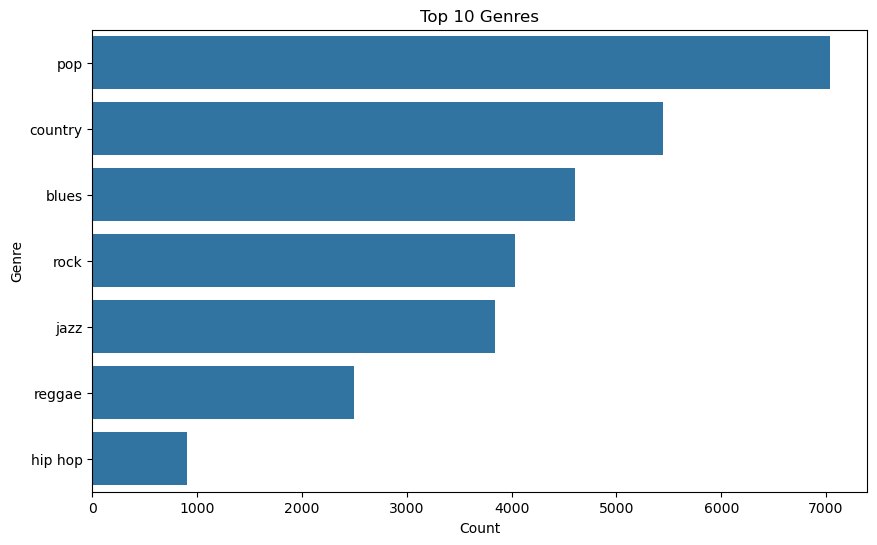

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1744\2456875460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


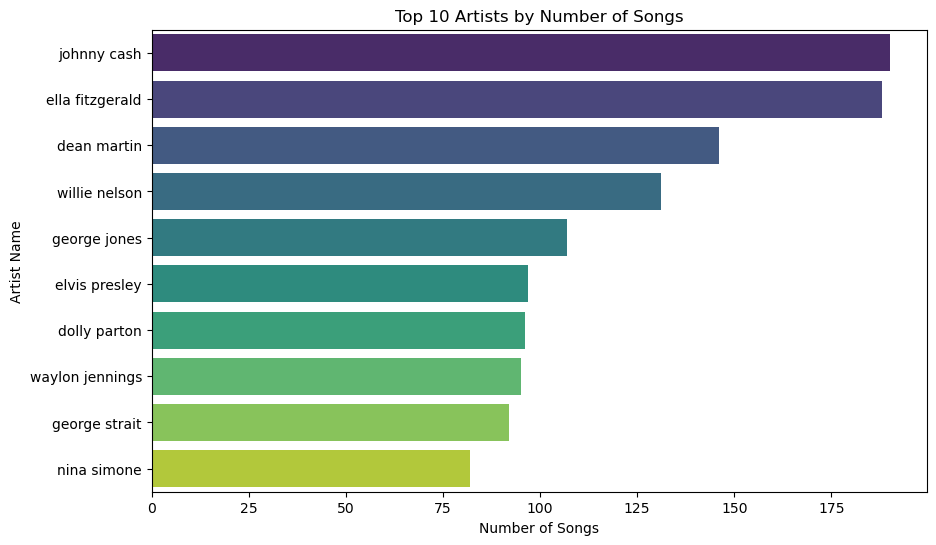

In [52]:
top_artists = df.groupby('artist_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

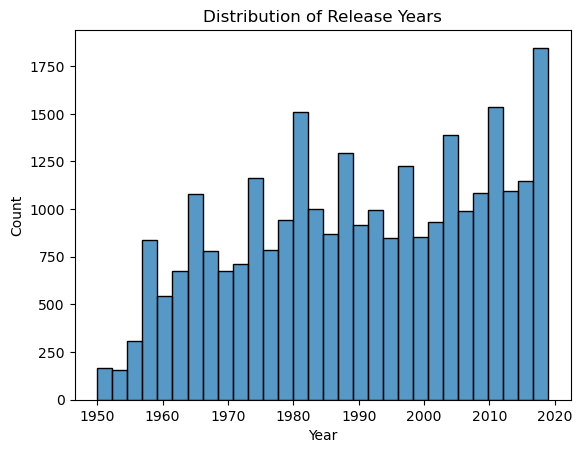

In [27]:
plt.figure()
sns.histplot(df['release_date'], bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

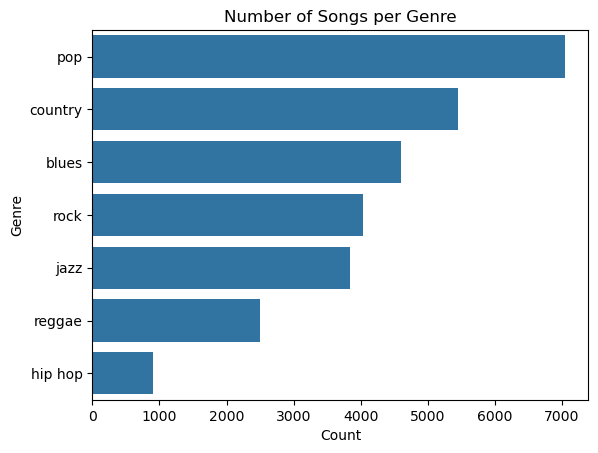

In [28]:
plt.figure()
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Number of Songs per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [29]:
genre_features = df.groupby('genre')[[
    'danceability', 'energy', 'valence',
    'acousticness', 'instrumentalness', 'loudness'
]].mean()

genre_features

,danceability,energy,valence,acousticness,instrumentalness,loudness
genre,,,,,,
blues,0.480965,0.581534,0.545578,0.365311,0.094538,0.663557
country,0.539954,0.466350,0.533004,0.456726,0.018275,0.634207
hip hop,0.729100,0.703236,0.603754,0.143989,0.015389,0.726908
jazz,0.516471,0.463430,0.467085,0.502529,0.233577,0.607040
pop,0.525376,0.601097,0.532396,0.305001,0.046107,0.683559
reggae,0.705711,0.589931,0.706386,0.179935,0.050190,0.681872
rock,0.463619,0.700954,0.458340,0.197402,0.092790,0.708488


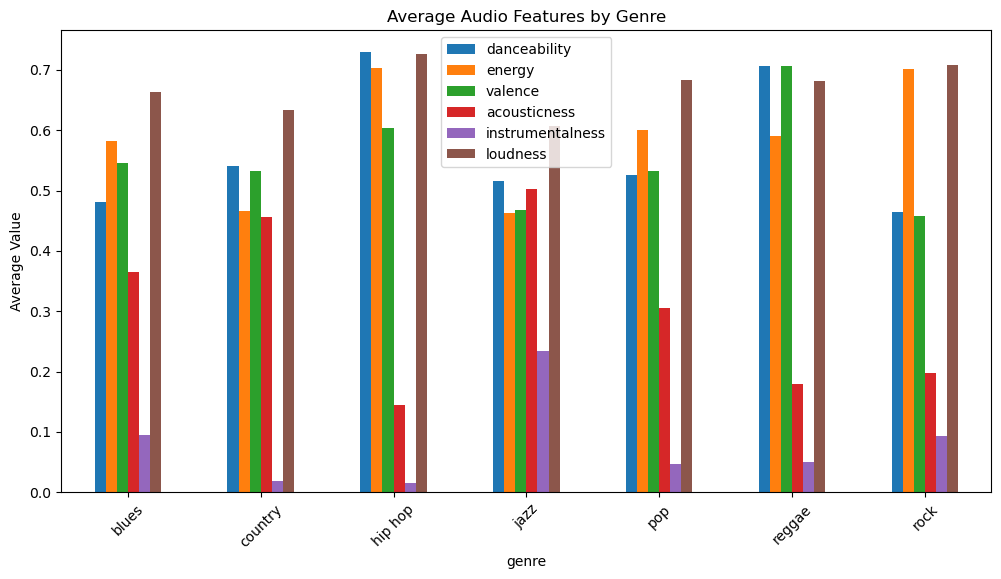

In [30]:
genre_features.plot(kind='bar', figsize=(12,6))
plt.title('Average Audio Features by Genre')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

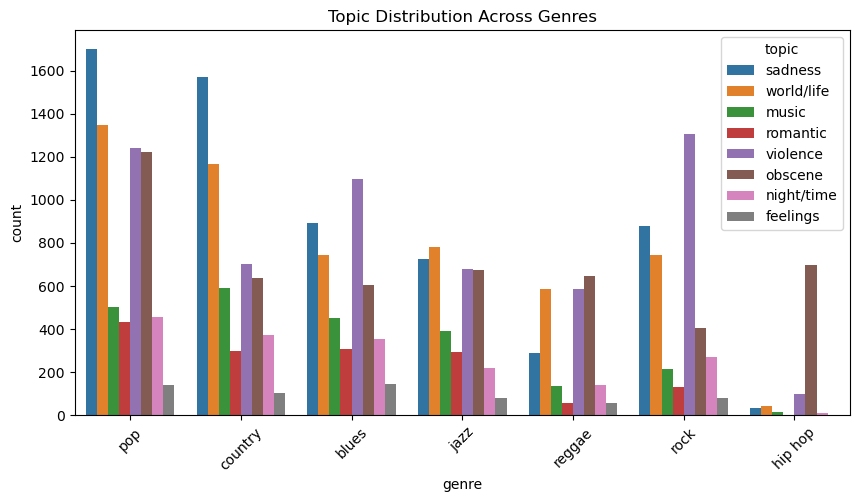

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='genre', hue='topic')
plt.title('Topic Distribution Across Genres')
plt.xticks(rotation=45)
plt.show()

In [32]:
lyric_columns = [
    'dating', 'violence', 'world/life', 'night/time',
    'romantic', 'sadness', 'feelings', 'obscene'
]

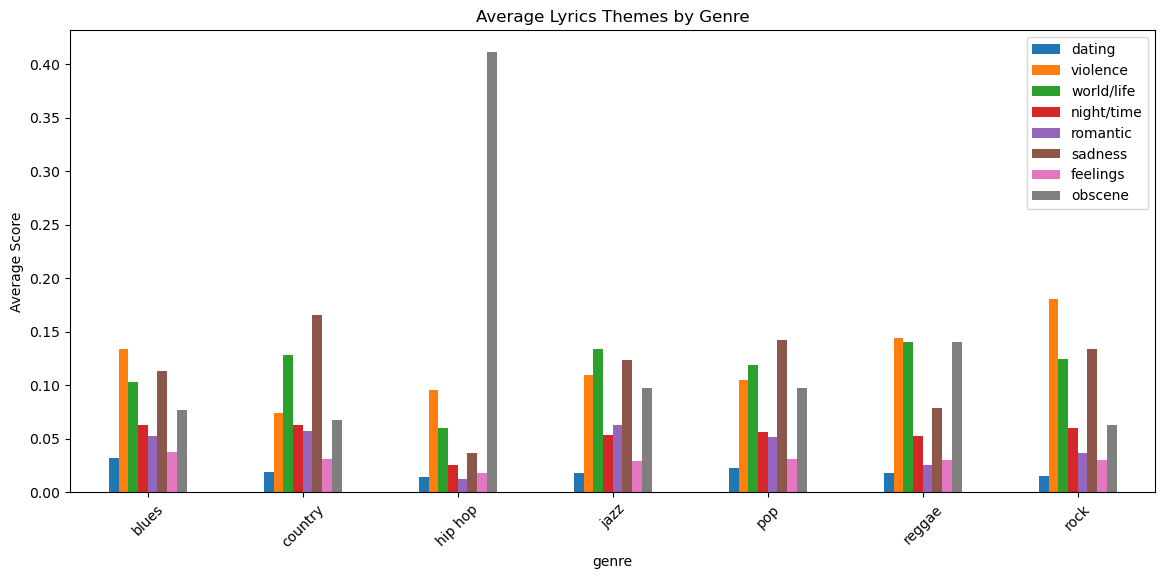

In [33]:
df.groupby('genre')[lyric_columns].mean().plot(
    kind='bar', figsize=(14,6)
)
plt.title('Average Lyrics Themes by Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

In [34]:
df[lyric_columns].mean().sort_values(ascending=False)

sadness       0.129389
world/life    0.120973
violence      0.118396
obscene       0.097168
night/time    0.057387
romantic      0.048681
feelings      0.030996
dating        0.021112
dtype: float64

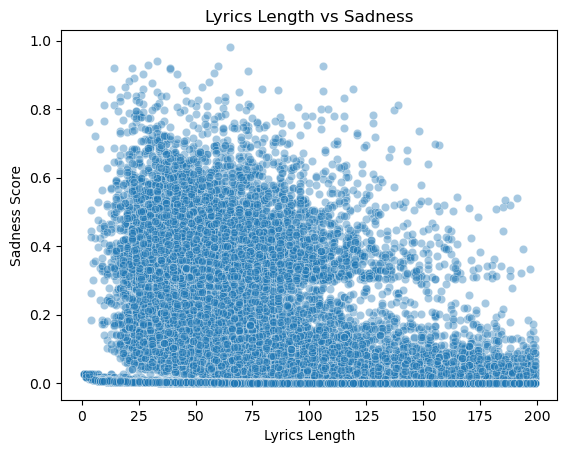

In [35]:
plt.figure()
sns.scatterplot(x='len', y='sadness', data=df, alpha=0.4)
plt.title('Lyrics Length vs Sadness')
plt.xlabel('Lyrics Length')
plt.ylabel('Sadness Score')
plt.show()

### Correlation Heatmap

In [36]:
numeric_cols = [
    'danceability', 'energy', 'valence',
    'acousticness', 'instrumentalness', 'loudness',
    'len', 'age'
] + lyric_columns

In [37]:
corr = df[numeric_cols].corr()

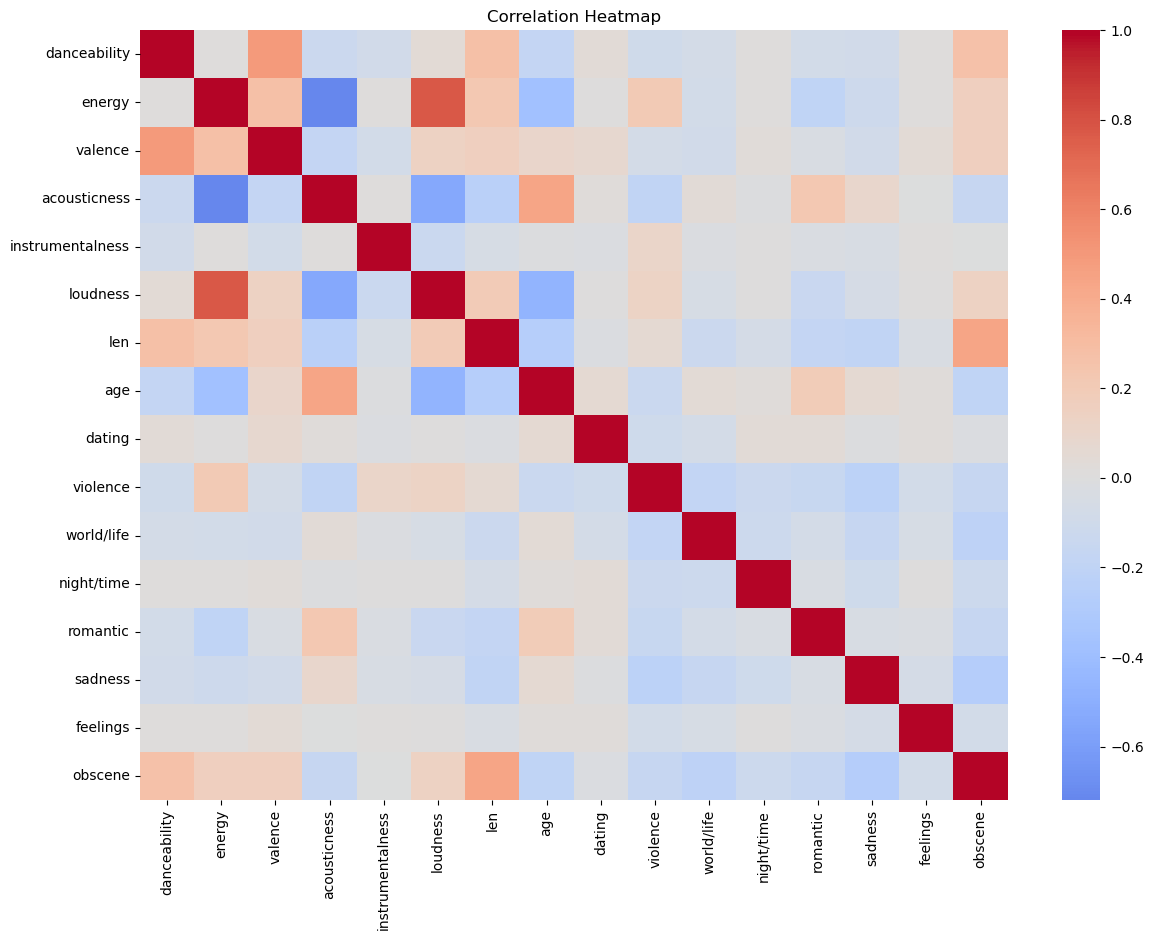

In [38]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
corr['valence'].sort_values(ascending=False)

valence             1.000000
danceability        0.493627
energy              0.280487
len                 0.155399
obscene             0.153461
loudness            0.133451
age                 0.099273
dating              0.078065
feelings            0.040484
night/time          0.031135
romantic           -0.037168
violence           -0.070012
instrumentalness   -0.077332
world/life         -0.086404
sadness            -0.087502
acousticness       -0.172910
Name: valence, dtype: float64

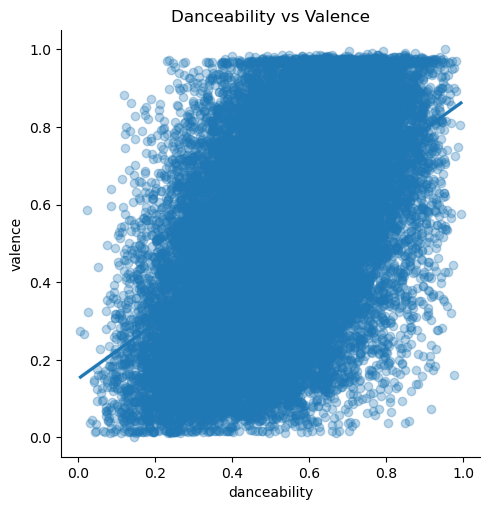

In [40]:
sns.lmplot(x='danceability', y='valence', data=df, scatter_kws={'alpha':0.3})
plt.title('Danceability vs Valence')
plt.show()

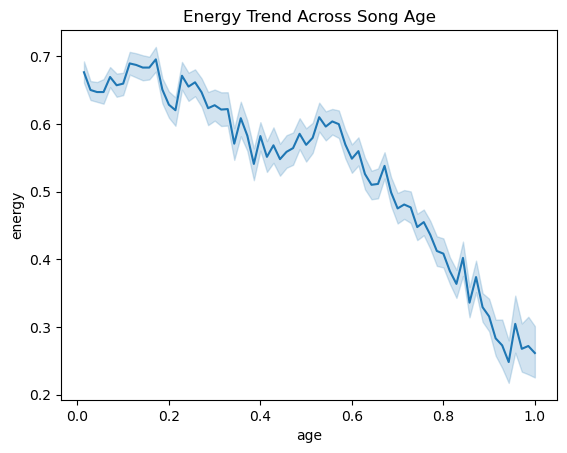

In [41]:
plt.figure()
sns.lineplot(x='age', y='energy', data=df)
plt.title('Energy Trend Across Song Age')
plt.show()

### Preprocessing the Data

In [61]:
df['combined_features'] = (
    df['genre'].fillna('') + ' ' +
    df['artist_name'].fillna('') + ' ' +
    df['track_name'].fillna('')
)

In [62]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

### Recommendation System

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(song_title, df, tfidf_matrix, top_n=10):
    # Get index of the song
    idx = df[df['track_name'].str.lower() == song_title.lower()].index

    if len(idx) == 0:
        print("Song not found in the dataset.")
        return None

    idx = idx[0]

    # Compute similarity ONLY for this song
    sim_scores = cosine_similarity(
        tfidf_matrix[idx],
        tfidf_matrix
    ).flatten()

    # Get top similar songs
    sim_indices = sim_scores.argsort()[::-1][1:top_n+1]

    return df.iloc[sim_indices][['track_name', 'artist_name', 'genre']]

### Generate Recommendations

In [70]:
recommended_songs=get_recommendations(
    song_title="cry",
    df=df,
    tfidf_matrix=tfidf_matrix,
    top_n=10
)
recommended_songs

,track_name,artist_name,genre
2,cry,johnnie ray,pop
12887,keep on loving you,johnnie taylor,blues
15294,too many memories,johnnie taylor,blues
14542,there's nothing i wouldn't do,johnnie taylor,blues
14679,lately,johnnie taylor,blues
13887,steal away,johnnie taylor,blues
14701,don't make me late,johnnie taylor,blues
12881,"baby, we've got love",johnnie taylor,blues
13247,i got to love somebody's baby,johnnie taylor,blues
12882,i need lots of love,johnnie taylor,blues


### Visualize Recommendations

C:\Users\USER\AppData\Local\Temp\ipykernel_1744\269018342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')


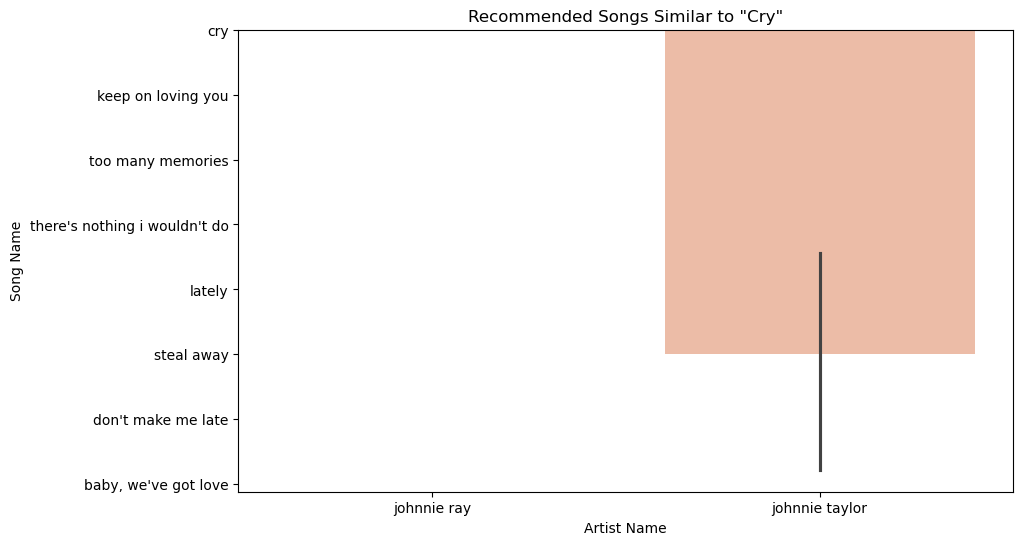

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')
plt.title('Recommended Songs Similar to "Cry"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()